Aujourd'hui petit travail sur l'enquête Marsouin. Une série d'enquêtes menée par la région Bretagne et qui a pour spécificité d'interroger notamment les entreprises sur leur rapport au numérique. 

In [10]:
# Pandas la librairie préférée des datascientists sous Python (selon mon tout
# petit échantillon représentatif)
import pandas as pd
#Seaborn une librairie sympathique pour la data visualization 
import seaborn as sb
#Son extension seaborn objets (elle nous servira pour les stripplots)
import seaborn.objects as so
# Matplotlib.pyplot, des fonctions et objets de matplotlib qui 
# ne sont pas inclue dans pandas
import matplotlib.pyplot as plt

Commençons par définir une série de grandes questions. Pour cela regardons les données à notre disposition

In [145]:
#On importe Marsouin (ici il faut trouver le bon lien 
# en s'adaptant à votre ordinateur)
df = pd.read_excel("C:/Users/cypri/OneDrive/Bureau/Cours Télécom Paris/Sociologie du numérique contemporain/TD/Séance 3/marsouin-entreprises_2023_bdd_anom.xlsx")

In [20]:
df.head(5)

,id,G01Q03,G01Q04,G01Q05,G01Q06,G01Q07,G01Q08,G01Q09,G01Q10,G02Q11[SQ01],...,G06Q54[SQ02],G06Q54[SQ03],G06Q54[SQ04],G06Q54[SQ05],G06Q54[SQ06],G06Q54[SQ07],G06Q54[SQ08],G06Q55,G06Q56,poids
0,1,"Act. spéc., scient. et tech. et act. de serv. ...",Ille-et-Vilaine,L'unique établissement de l'entreprise,Non,NaN,Entre 10 et 20 ans,Entre 20 et 49,En croissance,Plus de 75% des salariés,...,3,5,1,4,1,1,3,3,5,0.862862
1,2,"Act. spéc., scient. et tech. et act. de serv. ...",Côtes d'Armor,Un des établissements d'une entreprise multi-é...,Oui,Certaines sont à l'étranger,Moins de 3 ans,Entre 10 et 19,Ne souhaite pas répondre,Plus de 75% des salariés,...,"Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas",0.960166
2,3,"Act. spéc., scient. et tech. et act. de serv. ...",Morbihan,Un des établissements d'une entreprise multi-é...,Oui,Toutes dans la région Bretagne,Entre 3 et 5 ans,Entre 10 et 19,En diminution,De 10% à 25% des salariés,...,1,4,3,4,2,1,3,3,1,1.036514
3,4,"Act. spéc., scient. et tech. et act. de serv. ...",Ille-et-Vilaine,Un des établissements d'une entreprise multi-é...,Oui,Certaines sont à l'étranger,Moins de 3 ans,250 et plus,En diminution,Moins de 10% des salariés,...,"Vous n'avez pas d'opinion, vous ne savez pas",5,"Vous n'avez pas d'opinion, vous ne savez pas",2,"Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas","Vous n'avez pas d'opinion, vous ne savez pas",4,1,1.516859
4,5,"Act. spéc., scient. et tech. et act. de serv. ...",Ille-et-Vilaine,Un des établissements d'une entreprise multi-é...,Oui,Toutes en France,Entre 3 et 5 ans,Entre 20 et 49,En croissance,Moins de 10% des salariés,...,1,5,5,2,1,1,1,2,5,0.862862


Pour commencer nous allons faire quelques statistiques dans l'ordre. Nous allons nous intéresser à quelques aspects du numérique dans les entreprises. Pour commencer nous allons chercher à identifier quelques chiffres clés décrivant ces aspects en faisant des statistiques descriptives.

Nous allons chercher à établir quelques éléments de statistique descriptive : des moyennes, des écarts-types, des représentations de la distribution de variables et quelques tests statistiques. 

Cependant l'enquête Marsouin ne contient quasiment que des variables catégorielles, comme la plupart des enquêtes sociologiques. Il faudra donc s'adapter à ces variables. 

On peut d'abord commencer par faire des recodages (un élément important du nettoyage des données). 

In [146]:
#Pour renommer des variables 
df = df.rename(columns={"G01Q03": "Secteur d'activité"})
df["G06Q55"] = pd.to_numeric(df["G06Q55"], errors = "coerce")
df = df.rename(columns={"G06Q55": "Note sur le recours au numérique de l'entreprise"})


In [149]:
#Pour renommer des modalités d'une variable 
df["Secteur d'activité"] = df["Secteur d'activité"].replace(
    {'Act. spéc., scient. et tech. et act. de serv. adm. et de soutien': 'Sciences et techniques', 
    'Enseignement, santé humaine et action sociale': 'Enseignement', 
    'Industrie manufacturière, industries extractives et autres' : "Industrie", 
    'Commerce, transports, hébergement et restauration' : "Commerce, logistique, hébergement"})


Nous allons maintenant pouvoir représenter la distribution d'une variable catégorielle entre différentes modalités. Le barplot est normalement fait pour cela mais en Python avec seaborn, on utilise la fonction histplot (histogramme normalement c'est pour les variables quantitatives mais pas ici). Barplot sert pour représenter 2 variables. 

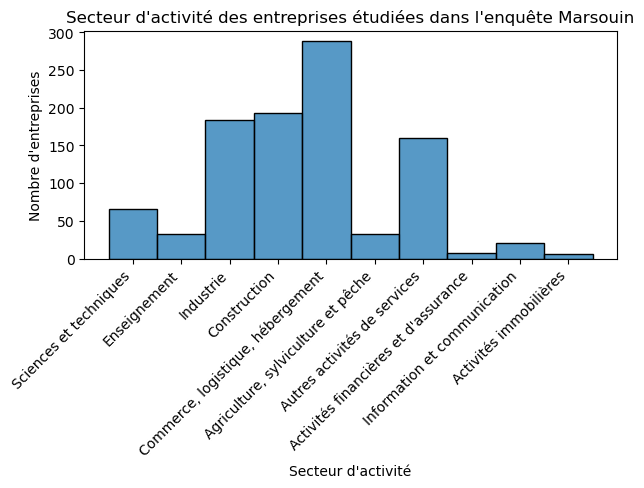

In [151]:
sb.histplot(x = "Secteur d'activité", data = df)
# Rotation des étiquettes de l'axe x pour éviter le chevauchement
plt.xticks(rotation=45, ha='right')  # Rotation de 45° et alignement à droite

# Ajuster l'espacement entre les étiquettes
plt.tight_layout()
plt.title("Secteur d'activité des entreprises étudiées dans l'enquête Marsouin")
plt.ylabel("Nombre d'entreprises")

# Affichage du graphique
plt.show()

Les barplots et histogrammes représentent un premier moyen d'étudier la distribution d'une variable catégorielle. On peut avoir les chiffres sur lesquels il se base dans un tableau. 

In [153]:
modalites_distribution = df["Secteur d'activité"].value_counts()
print(modalites_distribution) 

Secteur d'activité
Commerce, logistique, hébergement       288
Construction                            193
Industrie                               184
Autres activités de services            160
Sciences et techniques                   66
Enseignement                             33
Agriculture, sylviculture et pêche       33
Information et communication             21
Activités financières et d'assurance      8
Activités immobilières                    6
Name: count, dtype: int64


On peut aussi obtenir une série de statistiques descriptives pour une variable quantitative. Dont la moyenne, la médiane, l'écart-type, les quartiles, les extremas. 

In [155]:
stat_summary = df["Note sur le recours au numérique de l'entreprise"].describe()

print(stat_summary)

count    775.000000
mean       3.367742
std        1.106823
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Note sur le recours au numérique de l'entreprise, dtype: float64


In [159]:
médiane = df["Note sur le recours au numérique de l'entreprise"].median()

print(médiane)

3.0


Regardons la distribution de quelques autres variables importantes. 

In [161]:
df = df.rename(columns={"G02Q11[SQ01]": "Equipement PC fixes"})
df = df.rename(columns={"G02Q11[SQ02]": "Equipement PC portables"})
df = df.rename(columns={"G02Q11[SQ03]": "Equipement tablettes"})
df = df.rename(columns={"G02Q11[SQ04]": "Equipement téléphones portables"})

In [163]:
modalites_distribution1 = df["Equipement PC fixes"].value_counts()
print(modalites_distribution1) 
modalites_distribution2 = df["Equipement PC portables"].value_counts()
print(modalites_distribution2) 
modalites_distribution3 = df["Equipement tablettes"].value_counts()
print(modalites_distribution3) 
modalites_distribution4 = df["Equipement téléphones portables"].value_counts()
print(modalites_distribution4) 

Equipement PC fixes
Plus de 75% des salariés     244
De 10% à 25% des salariés    228
Moins de 10% des salariés    207
De 25% à 50% des salariés    145
De 50% à 75% des salariés     84
Aucun salarié                 68
NSP-RR                        16
Name: count, dtype: int64
Equipement PC portables
Moins de 10% des salariés    306
De 10% à 25% des salariés    194
Aucun salarié                153
Plus de 75% des salariés     138
De 25% à 50% des salariés     90
De 50% à 75% des salariés     64
NSP-RR                        47
Name: count, dtype: int64
Equipement tablettes
Aucun salarié                453
Moins de 10% des salariés    234
NSP-RR                       117
De 10% à 25% des salariés     77
Plus de 75% des salariés      55
De 25% à 50% des salariés     35
De 50% à 75% des salariés     21
Name: count, dtype: int64
Equipement téléphones portables
Plus de 75% des salariés     267
Moins de 10% des salariés    205
De 10% à 25% des salariés    172
De 25% à 50% des salariés    141


Maintenant passons à des analyses exploratoires multivariées. Le moyen le plus courant de le faire est d'utiliser des méthodes d'analyse factorielle. Nous avons déjà vu les ACM. Nous pouvons cette fois utilier les ACP (analyse en composante principale). Elles s'utilisent pour étudier des variables quantitatives.  

In [165]:
#On importe les packages 
import prince
from fanalysis.pca import PCA
import matplotlib.pyplot as plt

In [167]:
# On crée une nouvelle base qui ne contient que les variables que l'on veut introduire
df["G06Q56"] = pd.to_numeric(df["G06Q56"], errors = "coerce")
df["G06Q54[SQ01]"] = pd.to_numeric(df["G06Q54[SQ01]"], errors = "coerce")
df = df.rename(columns={"G06Q56": "Bonne volonté sobriété numérique"})
df = df.rename(columns={"G06Q54[SQ01]": "Etablissement peu concerné sobriété"})
df_ACP = pd.DataFrame(df[["Bonne volonté sobriété numérique", "Note sur le recours au numérique de l'entreprise", "Etablissement peu concerné sobriété"]])

In [179]:
#Suppression des valeurs manquantes
df_ACP = df_ACP.dropna()
df_ACP.head()

,Bonne volonté sobriété numérique,Note sur le recours au numérique de l'entreprise,Etablissement peu concerné sobriété
0,5.0,3.0,5.0
2,1.0,3.0,1.0
3,1.0,4.0,1.0
4,5.0,2.0,1.0
5,3.0,3.0,3.0


In [210]:
# Appliquer l'ACM avec fanalysis
ACP = prince.PCA(
    n_components=4,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
ACP = ACP.fit(df_ACP)

In [191]:
#Cette fois on imprime les contributions des différentes 
#modalités des variables (attention dans une ACP pas de coordonnées)
ACP.column_contributions_.style.format('{:.0%}')

component,0,1,2
variable,,,
Bonne volonté sobriété numérique,4%,93%,3%
Note sur le recours au numérique de l'entreprise,50%,0%,50%
Etablissement peu concerné sobriété,46%,7%,47%


In [222]:
donnees_ACP = ACP.transform(df_ACP)
print(donnees_ACP)

component         0         1         2
0          1.256796 -1.487094  0.772346
2         -0.107948  1.988037 -0.697809
3         -0.744261  2.009176 -0.057151
4         -0.040465 -0.768674 -1.813176
5          0.574424  0.250471  0.037268
..              ...       ...       ...
987       -1.313091 -0.726395 -0.531860
988       -1.949404 -0.705256  0.108798
989        0.574424  0.250471  0.037268
990        0.375445  1.803147 -0.211593
991       -1.181595  0.477640  0.832368

[667 rows x 3 columns]


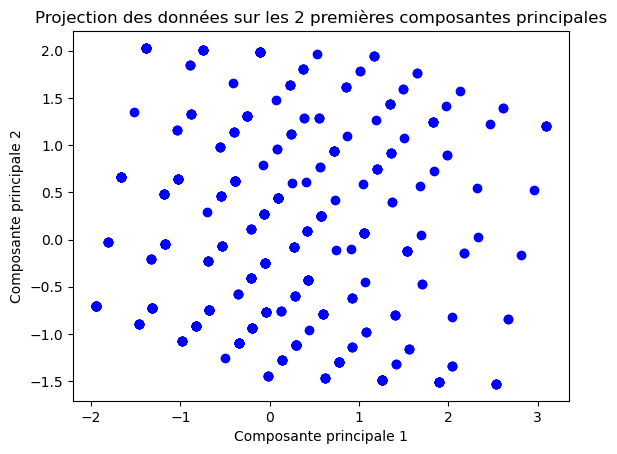

In [218]:
# Visualisation des données projetées sur les 2 premières composantes principales
plt.scatter(donnees_ACP[0], donnees_ACP[1], color='blue')

# Ajouter des labels
plt.title('Projection des données sur les 2 premières composantes principales')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')

# Afficher le graphique
plt.show()

EN fait il serait beaucoup plus intéressant de faire une ACP qui représente le nuage des variables. C'est assez compliqué à faire en Python mais beaucoup plus facile à faire en R grâce aux packages FactoMineR et explor de ce logiciel. 

http://localhost:8888/lab/tree/explor_var-Copy1.svg

Pour finir faisons quelques croisements de variables avec tests statistiques

In [259]:
from tabulate import tabulate
import scipy.stats as stats

df = df.rename(columns={"G03Q34": "Proportion télétravail coworking"})

# Génération du tableau (pas très beau)
crosstab_table = pd.crosstab(df["Proportion télétravail coworking"], df["Secteur d'activité"], normalize='columns') *100
crosstab_table = crosstab_table.round(2)

# Embellissement
styled_table = crosstab_table.style.format("{:.0f}").set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '14px'), ('background', '#4CAF50'), ('color', 'white')]}]
).bar(color='lightblue', axis=1)

# Affichage dans Jupyter Notebook
styled_table


Secteur d'activité,Activités financières et d'assurance,Activités immobilières,"Agriculture, sylviculture et pêche",Autres activités de services,"Commerce, logistique, hébergement",Construction,Enseignement,Industrie,Information et communication,Sciences et techniques
Proportion télétravail coworking,,,,,,,,,,
Aucun salarié,75,50,94,86,91,94,88,90,71,85
De 10% à 25%,0,0,0,2,0,1,0,1,0,2
De 25% à 50%,0,0,0,1,0,0,0,0,0,0
Moins de 10%,12,50,0,6,2,2,6,2,14,8
Ne sait pas répondre,12,0,6,5,6,4,6,7,14,5
Plus de 75%,0,0,0,0,0,0,0,0,0,2


Il est intéressant de voir que ce sont surtout les secteurs de l'économie financière et des TIC qui sont concernées. Ils représentent des métiers à forte proportion de cadre et de travail administratif et réglementaire. 

Tentons maintenant d'appliquer un test statistique pour tester la robustesse de ce constat. Pour les données catégorielles il existe deux tests très utilisés : le khi-deux et le V de Cramer, qui est une version réduite (entre 0 et 1) du khi-deux. 

In [261]:
stats.chi2_contingency(crosstab_table)

Chi2ContingencyResult(statistic=264.68756752059335, pvalue=6.912132568040286e-33, dof=45, expected_freq=array([[8.24103518e+01, 8.24103518e+01, 8.24103518e+01, 8.24021108e+01,
        8.24103518e+01, 8.24103518e+01, 8.24103518e+01, 8.24103518e+01,
        8.24185928e+01, 8.24268339e+01],
       [5.62988740e-01, 5.62988740e-01, 5.62988740e-01, 5.62932441e-01,
        5.62988740e-01, 5.62988740e-01, 5.62988740e-01, 5.62988740e-01,
        5.63045039e-01, 5.63101338e-01],
       [6.19987600e-02, 6.19987600e-02, 6.19987600e-02, 6.19925601e-02,
        6.19987600e-02, 6.19987600e-02, 6.19987600e-02, 6.19987600e-02,
        6.20049599e-02, 6.20111598e-02],
       [1.02717946e+01, 1.02717946e+01, 1.02717946e+01, 1.02707674e+01,
        1.02717946e+01, 1.02717946e+01, 1.02717946e+01, 1.02717946e+01,
        1.02728217e+01, 1.02738489e+01],
       [6.54086918e+00, 6.54086918e+00, 6.54086918e+00, 6.54021510e+00,
        6.54086918e+00, 6.54086918e+00, 6.54086918e+00, 6.54086918e+00,
        6.54

À votre tour: posez une question et tentez d'y répondre d'ici la fin de la séance !